In [1]:
from konlpy.tag import Okt
import pandas as pd
import re
from nltk import FreqDist
import sys
import pickle

#워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from PIL import Image
import pandas as pd
import numpy as np

# 01. 저장해둔 데이터셋과 불용어리스트 불러옴

contents_df = pd.read_csv('./articles_total_20180101_741.csv')

stopwords=pd.read_csv('stopword.csv',encoding='utf-8',header=None)[0].tolist() #불용어파일의 위치
# print("불용어 리스트는 \n",stopwords) # 불용어 확인

contents= list(contents_df['content'])


#남길 한글자 및 대체어 경로설정
reps=pd.read_csv('replace.csv',header=None,encoding='utf-8')  #오타 및 키워드대체어 파일 넣기

In [2]:
##02. 데이터 정제 함수

def one_word(x): #한글자 제외 및 불용어처리
    if x not in stopwords and len(x)>1 :
        return True
    else:
        return False

def word_replace(doc):
    for i in range(0, len(reps)):
        doc = doc.replace(str(reps[0][i]), str(reps[1][i]))
    return doc

def token_replace(tokens):
    for i in range(0,len(tokens)):
        for j in range(0, len(reps)):
            if tokens[i] == str(reps[0][j]):
                tokens[i]=str(reps[1][j])
    return tokens

In [3]:
##03. 데이터 정제

okt = Okt()

content_tokens=[]


for content in contents:

    #03-2.문서정제 및 대체어처리
    content=re.sub('[^ 가-힣A-Za-z0-9]+',' ',str(content))
    content=word_replace(content)

    #03-3.토큰화
    pos_tags = okt.pos(content)
    nouns_verb = [word for word, pos in pos_tags if pos in ['Noun','Verb', 'Adjective']] #본문을 원하는 품사만 추출

    #03-4.토큰정제 : 대체어처리 및 불용어 처리
    nouns_verb=token_replace(nouns_verb)
    nouns_verb=list(filter(one_word,nouns_verb))
    content_tokens.append(nouns_verb)

In [4]:
##04.빈도수 추출
from collections import Counter
import pandas as pd

tokens_for_count=content_tokens

for k in range(0,len(tokens_for_count)):
    temp_set=set(tokens_for_count[k])
    tokens_for_count[k]=list(temp_set)

count=Counter([x for sublist in tokens_for_count for x in sublist])

token=list(count.keys())
value=list(count.values())

count_df=pd.DataFrame({'token':token,'value': value})
count_df = count_df.sort_values(by=['value'], axis=0, ascending = False).reset_index(drop=True)

In [5]:
## 05빈도순위
# print("빈도순위\n",count_df)
count_df.to_csv('pre_count.csv',encoding='utf-8-sig',index=False) #순위를 csv파일로 저장

In [6]:
with open('daum_news.txt', 'a', newline='',encoding='utf-8-sig') as fa: #txt이름 형식맞춰서 지정
    for content in content_tokens:
         fa.write(' '.join(content)+'\n')

In [7]:
#txt파일 읽기 -> 변경할 부분
with open('daum_news.txt',encoding='utf-8-sig',mode='r') as fr:
   lines=fr.readlines()

#원본문서 정보
print("원본 문서의 길이는 : ",len(lines))

원본 문서의 길이는 :  1482


In [8]:
originals=[]
for line in lines:
    tokens=line.strip().split(' ')
    originals.append(tokens)

In [9]:
#중복제거
for k in range(0,len(originals)):
    temp_set=set(originals[k])
    originals[k]=list(temp_set)

In [10]:
#하나의 리스트로 병합
wordlist=[]
for original in originals:
    wordlist+=original

print(wordlist)

['필요한', '개발', '빅데이터', '해남', '설명', '맞은', '국가', '제대로', '친환경', '조명', '전라남도', '표방', '추진', '기반', '보성', '시도', '경제정책', '국내', '인공', '본격', '시작', '붙을', '자립', '공사', '출에', '재생', '인간', '관광', '행차', '인공지능', '세계', '기대', '전남', '에너지', '전담', '신재생에너지', '호텔', '클러스터', '기술', '건설', '받을', '한층', '연말', '균형발전', '목소리', '노무현', '방향', '도민', '공유경제', '지역', '자율', '기관', '미치지', '정부', '탄력', '포함', '기대한다', '되도록', '이처럼', '경제', '모색', '손길', '통한', '열고', '재생에너지', '일자리', '단지', '최대', '보인다', '참여', '해서는', '남해안', '되기', '계획', '전기차', '느낄', '전남도', '실험', '있기를', '저장', '전망', '성과', '실어', '목포', '문재인', '광주', '군데', '태양광', '시대', '부서', '한편', '정보통', '성장', '모델', '미래', '효율', '주기', '대통령', '비롯', '개최', '한양', '포럼', '하여', '인프라', '역할', '구성', '신년사', '지정', '국민', '기업', '장치', '혁신', '정책', '출이라는', '주주', '낙후', '지구', '사업', '산업혁명', '규모', '내야', '언급', '됐으나', '도시', '발전', '설립', '시티', '업체', '효과', '중심', '펴지고', '놓진', '상품', '과거', '의견', '주최', '빠르게', '빅데이터', '만들고', '부족하면', '꼽혔습니다', '대신', '특임', '경쟁력', '장비', '레시피', '생산', '무단', '개념', '민아', '가장', '이동', '최원', '바꾸면', '분석', '교수', 

In [17]:
#빈도수 높은 100개 단어 확인
counts = Counter(wordlist)
print(counts.most_common(100))

[('기술', 1014), ('사업', 978), ('도시', 910), ('기업', 840), ('지원', 816), ('계획', 764), ('개발', 758), ('농업', 744), ('도심', 734), ('지역', 700), ('추진', 696), ('기반', 684), ('재배', 654), ('환경', 632), ('서울', 616), ('생산', 612), ('미래', 604), ('시설', 590), ('시스템', 564), ('규모', 560), ('경제', 540), ('혁신', 538), ('투자', 534), ('진행', 528), ('확대', 528), ('교육', 466), ('국내', 454), ('인공', 454), ('모델', 452), ('서비스', 450), ('발전', 442), ('적극', 442), ('창업', 436), ('농장', 422), ('확보', 418), ('수직', 416), ('지속', 414), ('협력', 414), ('인공지능', 408), ('선정', 408), ('성장', 402), ('목표', 402), ('정부', 398), ('이상', 396), ('관계자', 396), ('통한', 392), ('성과', 390), ('복합', 384), ('적용', 382), ('작물', 382), ('현재', 380), ('업체', 378), ('기존', 378), ('배포', 376), ('청년', 376), ('가능한', 376), ('판매', 376), ('시장', 376), ('참여', 374), ('무단', 374), ('대상', 370), ('일자리', 368), ('중심', 366), ('설명', 364), ('구성', 362), ('마련', 362), ('뉴스', 356), ('현장', 354), ('체험', 352), ('연구', 350), ('디지털', 350), ('도입', 350), ('프로그램', 348), ('이용', 348), ('활성화', 346), ('과정', 340),

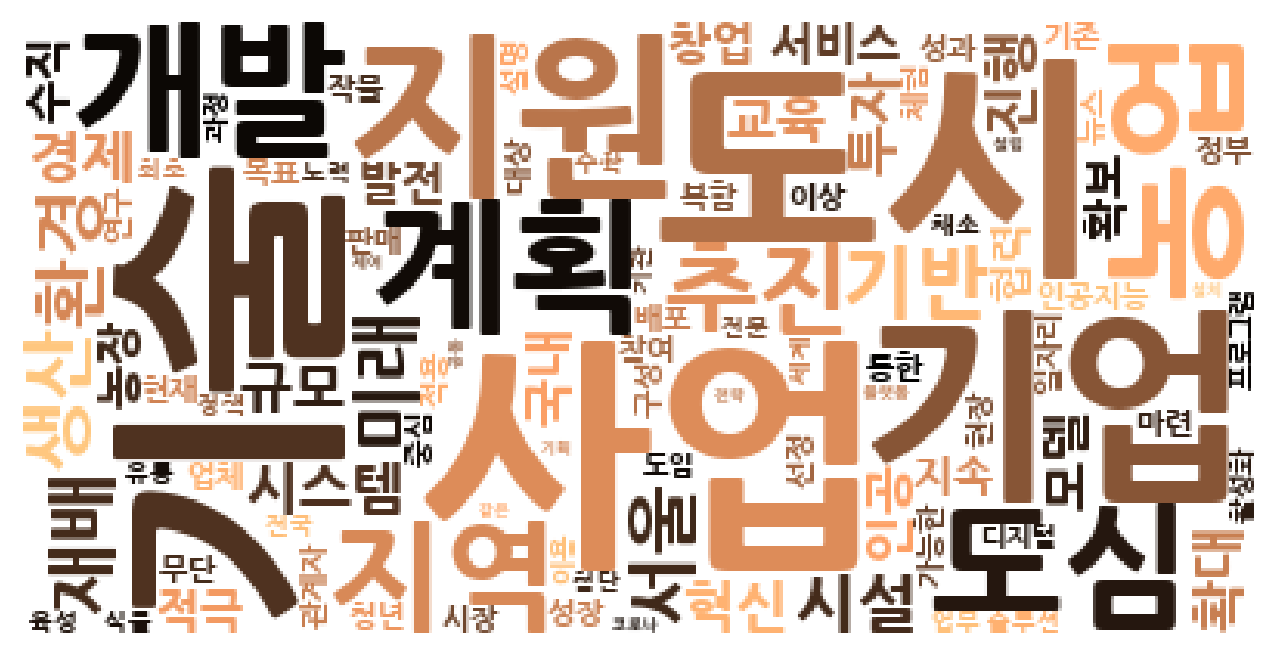

In [43]:
wc = WordCloud (max_words=100,
           background_color='white',
           colormap='copper',
           font_path= 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf')
wc.generate_from_frequencies(counts)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()